## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

## Load the Data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Quick overview
train_df.head()
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis (EDA)

### Check missing values

In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualize distributions

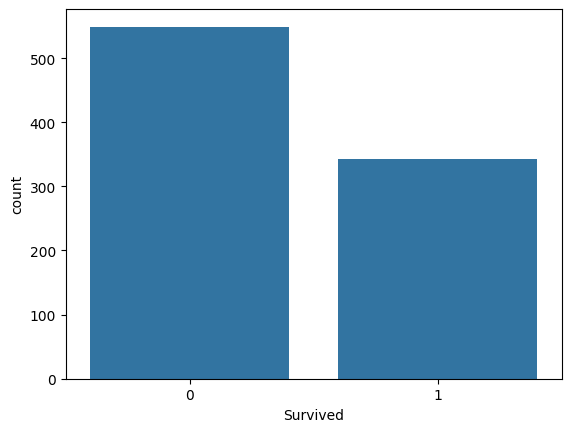

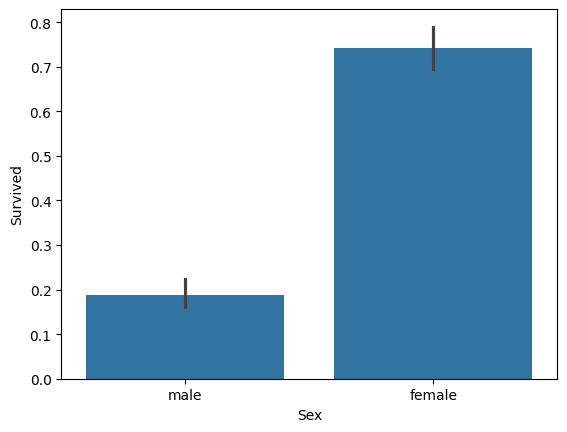

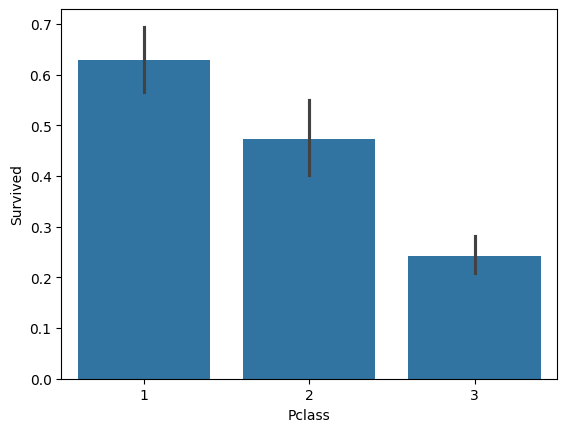

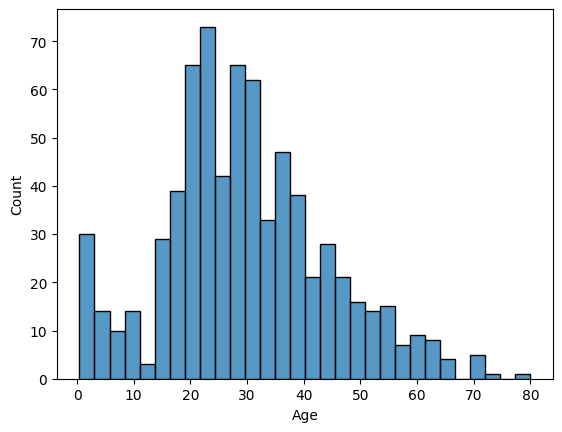

In [4]:
sns.countplot(x='Survived', data=train_df)
plt.show()

sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

sns.histplot(train_df['Age'].dropna(), bins=30)
plt.show()


## Data Preprocessing

### Fix missing values

In [ ]:
# fill missing values in the Age column with the median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
# fill missing values in the Embarked column with the most frequent value in the column
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

### Encode categorical variables

In [15]:
# convert categorical columns (Sex and Embarked) into numeric values using Label Encoding.
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

### Select features and target

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']
X_test = test_df[features]

## Split Data for Training

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Validate the Model

In [18]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
# print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8212290502793296


## Visualize Feature Importance

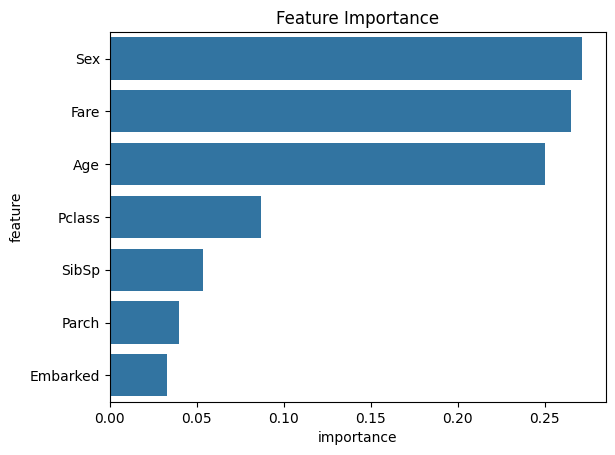

In [11]:
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


## Predict on Test Set and Save Submission

In [13]:
test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

os.makedirs('outputs', exist_ok=True)  # Ensure folder exists
submission.to_csv('outputs/titanic_submission.csv', index=False)